In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os   # to access files
import cv2  # to work with images   
import random # to shuffle the data


# Specify the path to the NPZ file
npz_file_path = 'C:\\Users\\atefe\\Desktop\\LUNGCANCERPROJECT\\full_archive.npz'

# Load the data from the NPZ file
data = np.load(npz_file_path, allow_pickle=True)
import numpy as np

# Specify the path to the NPZ file
npz_file_path = 'C:\\Users\\atefe\\Desktop\\LUNGCANCERPROJECT\\full_archive.npz'

# Load the data from the NPZ file
data = np.load(npz_file_path, allow_pickle=True)

# List all keys in the NPZ file
print("Keys in the NPZ file:", list(data.keys()))




Keys in the NPZ file: ['image', 'idx']


Keys in the NPZ file: ['image', 'idx']
Shape of images array: (475,)
Shape of idx array: (475,)
Data type of images: object


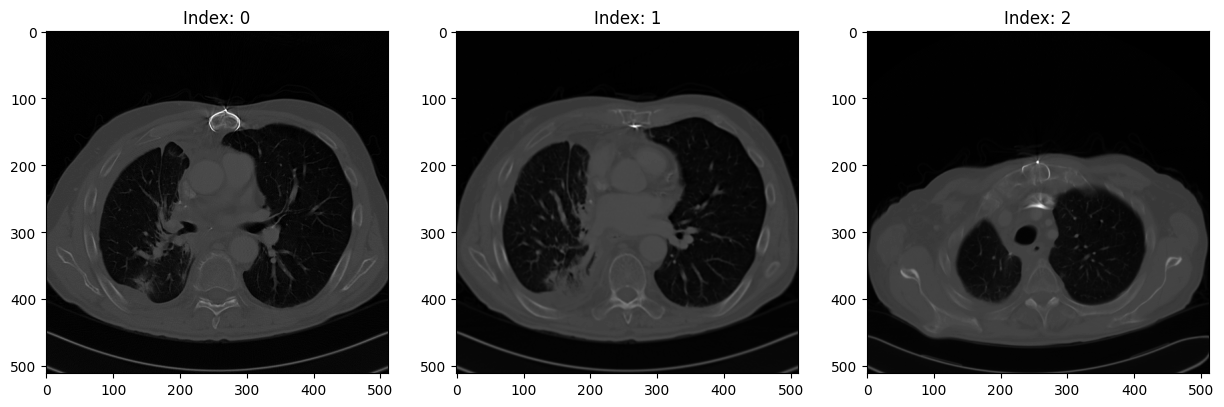

In [2]:
# Display the keys from the dataset
print("Keys in the NPZ file:", list(data.keys()))

# Display the shape and type of images and indices
images = data['image']
idx = data['idx']

print("Shape of images array:", images.shape)
print("Shape of idx array:", idx.shape)
print("Data type of images:", images.dtype)

# Display the first few images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].title.set_text(f'Index: {idx[i]}')
plt.show()


In [3]:
# Check if all images have the same shape
unique_shapes = set(img.shape for img in images)
print("Unique image shapes:", unique_shapes)

# Check the data type of the first image (assuming they're all the same if shapes are consistent)
if len(unique_shapes) == 1:
    print("Data type of images:", images[0].dtype)





Unique image shapes: {(3, 512, 512), (512, 512), (545, 512), (512, 604)}


In [4]:
# Function to convert and resize images
def process_image(img):
    # Convert to grayscale if it's not already (check if it has 3 channels)
    if img.ndim == 3 and img.shape[0] == 3:
        img = cv2.cvtColor(img.transpose(1, 2, 0), cv2.COLOR_RGB2GRAY)
    # Resize image
    img_resized = cv2.resize(img, (512, 512))
    return img_resized

# Process all images
images_processed = np.array([process_image(img) for img in images])

# Normalize the processed images
images_normalized = images_processed.astype(np.float32) / 255.0

# Flatten images if necessary for your model
images_flattened = images_normalized.reshape(images_normalized.shape[0], -1)

print("Processed images shape:", images_normalized.shape)


Processed images shape: (475, 512, 512)


In [5]:
import numpy as np
import cv2

# Define a standard size for all images
standard_size = (512, 512)

# Function to convert and resize images
def process_image(img):
    # Check if the image is in color (3 channels)
    if img.ndim == 3 and img.shape[0] == 3:
        # Convert from RGB to Grayscale
        img = cv2.cvtColor(img.transpose(1, 2, 0), cv2.COLOR_RGB2GRAY)
    elif img.ndim == 2:
        pass  # Image is already grayscale
    else:
        raise ValueError("Unexpected image format")

    # Resize image to standard size
    img_resized = cv2.resize(img, standard_size)
    return img_resized

# Apply the processing function to each image
images_processed = np.array([process_image(img) for img in images])

# Check new shapes
print("Shape of processed images:", images_processed.shape)


Shape of processed images: (475, 512, 512)


In [6]:
# Normalize the processed images
images_normalized = images_processed.astype(np.float32) / 255.0

# Flatten images if necessary for your model
images_flattened = images_normalized.reshape(images_normalized.shape[0], -1)

print("Shape of flattened images:", images_flattened.shape)


Shape of flattened images: (475, 262144)


In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test = train_test_split(images_flattened, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (380, 262144)
Shape of X_test: (95, 262144)


Original number of features: 262144
Reduced number of features: 200


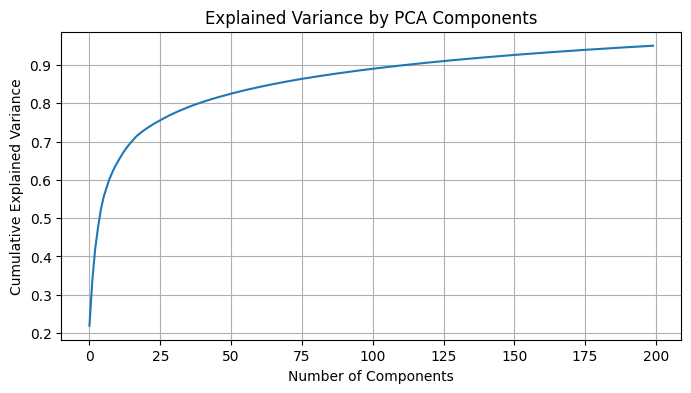

In [8]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
images_standardized = scaler.fit_transform(images_flattened)
from sklearn.decomposition import PCA

# Initialize PCA, choosing to keep 95% of the variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(images_standardized)

print("Original number of features:", images_flattened.shape[1])
print("Reduced number of features:", principal_components.shape[1])
import matplotlib.pyplot as plt

# Plot the explained variance
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


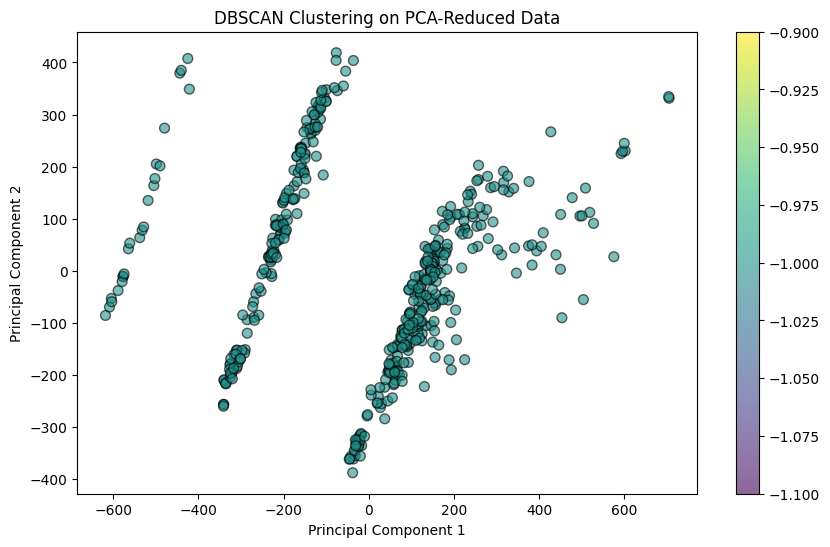

In [9]:
from sklearn.cluster import DBSCAN

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # These parameters may need tuning
dbscan_clusters = dbscan.fit_predict(principal_components)

# Visualize the clustering
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=dbscan_clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('DBSCAN Clustering on PCA-Reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()
